# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [2]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import log_loss

/home/chienyu/anaconda2/envs/iaml/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [13]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')
print('Number of instances: {}, number of attributes: {}'.format(train_A.shape[0], train_A.shape[1]))
print('Number of instances: {}, number of attributes: {}'.format(valid_A.shape[0], valid_A.shape[1]))

Number of instances: 2093, number of attributes: 520
Number of instances: 1113, number of attributes: 520


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [13]:
# Your code goes here
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [15]:
# Your code goes here
names = list(train_A.iloc[:0,1:501])
names

['dim1',
 'dim2',
 'dim3',
 'dim4',
 'dim5',
 'dim6',
 'dim7',
 'dim8',
 'dim9',
 'dim10',
 'dim11',
 'dim12',
 'dim13',
 'dim14',
 'dim15',
 'dim16',
 'dim17',
 'dim18',
 'dim19',
 'dim20',
 'dim21',
 'dim22',
 'dim23',
 'dim24',
 'dim25',
 'dim26',
 'dim27',
 'dim28',
 'dim29',
 'dim30',
 'dim31',
 'dim32',
 'dim33',
 'dim34',
 'dim35',
 'dim36',
 'dim37',
 'dim38',
 'dim39',
 'dim40',
 'dim41',
 'dim42',
 'dim43',
 'dim44',
 'dim45',
 'dim46',
 'dim47',
 'dim48',
 'dim49',
 'dim50',
 'dim51',
 'dim52',
 'dim53',
 'dim54',
 'dim55',
 'dim56',
 'dim57',
 'dim58',
 'dim59',
 'dim60',
 'dim61',
 'dim62',
 'dim63',
 'dim64',
 'dim65',
 'dim66',
 'dim67',
 'dim68',
 'dim69',
 'dim70',
 'dim71',
 'dim72',
 'dim73',
 'dim74',
 'dim75',
 'dim76',
 'dim77',
 'dim78',
 'dim79',
 'dim80',
 'dim81',
 'dim82',
 'dim83',
 'dim84',
 'dim85',
 'dim86',
 'dim87',
 'dim88',
 'dim89',
 'dim90',
 'dim91',
 'dim92',
 'dim93',
 'dim94',
 'dim95',
 'dim96',
 'dim97',
 'dim98',
 'dim99',
 'dim100',
 'dim101

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [16]:
# Your code goes here
X_tr = train_A.iloc[:,1:501] #training features
X_val = valid_A.iloc[:,1:501]   #validation features
y_tr = train_A["is_person"]   #training targets
y_val = valid_A["is_person"]  #validation targets
print("Number of data points and attributes in training set: {} and {}".format(X_tr.shape[0],X_tr.shape[1]))
print("Number of data points in training set(target): {}".format(y_tr.shape[0]))
print("Number of data points and attributes in validation set: {} and {}".format(X_val.shape[0], X_val.shape[1]))
print("Number of data points in validation set(target): {}".format(y_val.shape[0]))


Number of data points and attributes in training set: 2093 and 500
Number of data points in training set(target): 2093
Number of data points and attributes in validation set: 1113 and 500
Number of data points in validation set(target): 1113


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

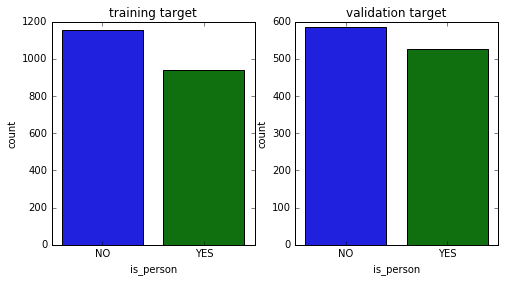

In [10]:
# Your code goes here
fig = plt.figure(figsize=(8,4))
labels=["NO","YES"]
ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(x=y_tr, data = train_A)
ax1.set_xticklabels(labels)
ax1.set_title("training target")
                    
ax2 = plt.subplot(1,2,2)
ax2 = sns.countplot(x=y_val, data = valid_A)
ax2.set_xticklabels(labels)
ax2.set_title("validation target")

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

*Your answer goes here*

The baseline dummy classifier always predicts the most frequent label in the training set, in this case which is 'NO'. However, in this data set, there are only two labels, which make the score of accuracy only get around 50%.

In [17]:
# Your code goes here
class_counts = train_A["is_person"].value_counts()
print("TThe baseline classifier would achieve a classification accuracy score of: {}".format(class_counts[0]/class_counts.values.sum()))

TThe baseline classifier would achieve a classification accuracy score of: 0.55088389871


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

In [14]:
# Your code goes here
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_tr, y_tr)
print('Classification accuracy on training set: {}'.format(LR.score(X_tr, y_tr)))
print('Classification accuracy on test set: {}'.format(LR.score(X_val, y_val)))

Classification accuracy on training set: 0.55088389871
Classification accuracy on test set: 0.526504941599


*Your answer goes here*

The classifier perform badly, same as the dummy classifier, they only get around 50% accuracy.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations across the columns of your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [15]:
# Your code goes here
print('The mean of the first 5 features')
print(np.mean(X_tr.iloc[:,0:5], axis = 0))

print('The standard deviations of the first 5 features')
print(np.std(X_tr.iloc[:,0:5], axis = 0))

The mean of the first 5 features
dim1    0.001751
dim2    0.000756
dim3    0.004317
dim4    0.001853
dim5    0.002272
dtype: float64
The standard deviations of the first 5 features
dim1    0.001193
dim2    0.001406
dim3    0.003693
dim4    0.001340
dim5    0.001598
dtype: float64


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [16]:
# Your code goes here
#In practice we often ignore the shape of the distribution and just transform the data to center it 
#by removing the mean value of each feature, then scale it by dividing non-constant features 
#by their standard deviation.


scale = StandardScaler().fit(X_tr)
X_tr_std = scale.transform(X_tr)
X_val_std = scale.transform(X_val)

print('The transformed mean of the first 5 features in training set')
print(np.mean(X_tr_std[:,0:5], axis = 0))
print('The transformed standard deviations of the first 5 features in training set')
print(np.std(X_tr_std[:,0:5], axis = 0))

print('The transformed mean of the first 5 features in validation set')
print(np.mean(X_val_std[:,0:5], axis = 0))
print('The transformed standard deviations of the first 5 features in validation set')
print(np.std(X_val_std[:,0:5], axis = 0))

The transformed mean of the first 5 features in training set
[ -3.39485301e-17  -2.20665446e-17   2.44429417e-16   1.42583827e-16
  -5.77125012e-17]
The transformed standard deviations of the first 5 features in training set
[ 1.  1.  1.  1.  1.]
The transformed mean of the first 5 features in validation set
[-0.00550612 -0.0382933   0.10915098  0.09369314  0.03057844]
The transformed standard deviations of the first 5 features in validation set
[ 1.01310886  0.96981949  1.0492285   1.05684479  0.97471336]


*Your answer goes here*

Yes, this is close to what I expect. After standardized the feature, the mean of the features we get in the training set is really close to zero and we get an unit standard deviations,that means standardisation is successful.
Moreover, the mean and the standard devations in validation data set I also get around zero and one. We use training data to train the model and use testing data to validate it, therefore we only have to scale the training set.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.

In [17]:
# Your code goes here
LR.fit(X_tr_std, y_tr)
print('Classification accuracy on training set: {}'.format(LR.score(X_tr_std, y_tr)))
print('Classification accuracy on test set: {}'.format(LR.score(X_val_std, y_val)))

Classification accuracy on training set: 0.810797897754
Classification accuracy on test set: 0.643306379155


*Your answer goes here*

After transforming the training dataset, both of the accuracy has improved. The accuracy rate on training set from 55% improve to 81%.

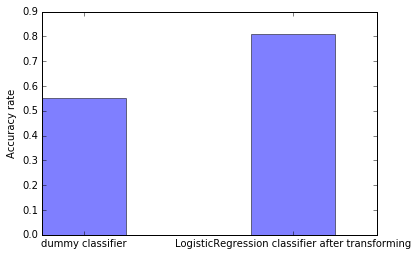

In [18]:
objects = ('dummy classifier', 'LogisticRegression classifier after transforming')
y_pos = np.arange(len(objects))
score=[class_counts[0]/class_counts.values.sum(),LR.score(X_tr_std, y_tr)]
 
plt.bar(y_pos, score, align='center', width = 0.4, alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy rate')
 
plt.show()

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [19]:
# Your code goes here
kf = KFold(2093, n_folds=3, shuffle = True, random_state=0)
i=1
print("The number of test samples of each fold:")
for train_index, test_index in kf:
    X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
    print("fold {}: {}".format(i,X_test.shape[0]))
    i+=1

The number of test samples of each fold:
fold 1: 698
fold 2: 698
fold 3: 697


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [24]:
# Your code goes here
clist =  np.logspace(start = -5,stop = 5, num =20)
acc_score = np.empty(shape = [0,2])
each_score = []
for i in range(20):
    lr_c = LogisticRegression(solver='lbfgs', C = clist[i])
    for train_index, test_index in kf:
        X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
        y_train, y_test = y_tr[train_index], y_tr[test_index]
        lr_c.fit(X_train, y_train)
        each_score = np.append(each_score,lr_c.score(X_test,y_test)) # get score of each fold and store in array
    avg_score = np.average(each_score)  
    acc_score = np.append(acc_score,[[clist[i],avg_score]], axis=0)
    each_score=[]
print(acc_score)


[[  1.00000000e-05   5.55658101e-01]
 [  3.35981829e-05   6.32108682e-01]
 [  1.12883789e-04   6.68406282e-01]
 [  3.79269019e-04   6.82261541e-01]
 [  1.27427499e-03   6.98987611e-01]
 [  4.28133240e-03   7.10458521e-01]
 [  1.43844989e-02   6.86094313e-01]
 [  4.83293024e-02   6.71762185e-01]
 [  1.62377674e-01   6.56954556e-01]
 [  5.45559478e-01   6.46439441e-01]
 [  1.83298071e+00   6.41180856e-01]
 [  6.15848211e+00   6.37356990e-01]
 [  2.06913808e+01   6.33058311e-01]
 [  6.95192796e+01   6.32580756e-01]
 [  2.33572147e+02   6.32580756e-01]
 [  7.84759970e+02   6.33058311e-01]
 [  2.63665090e+03   6.32103201e-01]
 [  8.85866790e+03   6.32103201e-01]
 [  2.97635144e+04   6.33535866e-01]
 [  1.00000000e+05   6.33058311e-01]]


### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

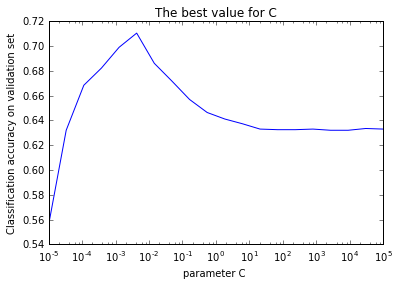

In [19]:
# Your code goes here
plt.plot(clist,acc_score[:,1])
plt.xlabel('parameter C ')
plt.ylabel('Classification accuracy on validation set')
plt.title('The best value for C')
plt.xscale('log')
plt.show()

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [21]:
# Your code goes here
accuracy = acc_score[:,1]
maxindex = np.where(accuracy == accuracy.max())
opt_c = acc_score[maxindex][0][0]
print("Optimal value for the regularisation parameter C: {}".format(opt_c))
lr_opt = LogisticRegression(solver='lbfgs', C = opt_c)
lr_opt.fit(X_tr_std, y_tr)
print("Accuracy on the validation set: {}".format(lr_opt.score(X_val_std, y_val)))

Optimal value for the regularisation parameter C: 0.00428133239872
Accuracy on the validation set: 0.696316262354


### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [22]:
# Your code goes here
lr_cv = LogisticRegressionCV(Cs = list(np.logspace(start = -5,stop = 5, num =20)), cv = 3, solver='lbfgs', random_state=0)
lr_cv.fit(X_tr_std, y_tr)
print("Optimal value for the parameter C: {}".format(lr_cv.C_ ))
print("Accuracy on the validation set: {}".format(lr_cv.score(X_val_std, y_val)))

print("yes, the result is same as the Q1.14")

Optimal value for the parameter C: [ 0.00428133]
Accuracy on the validation set: 0.696316262354
yes, the result is same as the Q1.14


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to Lab_3 if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [23]:
# Your code goes here
RFL = RandomForestClassifier(n_estimators=500, random_state=42)
RFL.fit(X_tr_std, y_tr)
print("Accuracy on the Training set: {}".format(RFL.score(X_tr_std, y_tr)))
print("Accuracy on the validation set: {}".format(RFL.score(X_val_std, y_val)))

Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.692722371968


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

*Your answer goes here*

The accuracy rate of training set is 100%, but on the validation set it only get 69%, we may suggest that this clssifier has been observed to overfit for some datasets with noisy.

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [24]:
# Your code goes here
importance = RFL.feature_importances_
importance = pd.DataFrame(importance, index=X_tr.columns, columns=["Importance"])
des_importance = importance.sort_index(by='Importance', ascending=False)
print(des_importance.head(50))

        Importance
dim21     0.007572
dim51     0.007559
dim360    0.007032
dim4      0.006193
dim479    0.006054
dim76     0.006026
dim283    0.005811
dim461    0.005606
dim343    0.005451
dim398    0.004859
dim348    0.004783
dim74     0.004742
dim485    0.004716
dim356    0.004702
dim330    0.004640
dim217    0.004606
dim263    0.004577
dim222    0.004218
dim134    0.004131
dim500    0.004064
dim274    0.004042
dim254    0.004002
dim206    0.003890
dim423    0.003867
dim347    0.003813
dim17     0.003728
dim326    0.003704
dim90     0.003703
dim92     0.003701
dim329    0.003687
dim214    0.003668
dim322    0.003613
dim289    0.003595
dim54     0.003591
dim440    0.003581
dim427    0.003576
dim73     0.003462
dim35     0.003461
dim77     0.003414
dim312    0.003363
dim315    0.003337
dim96     0.003312
dim288    0.003308
dim483    0.003259
dim299    0.003251
dim48     0.003206
dim442    0.003171
dim201    0.003056
dim344    0.003012
dim294    0.003006


/home/chienyu/anaconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  after removing the cwd from sys.path.


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [25]:
# Your code goes here
svc_linear = SVC(kernel='linear').fit(X_tr_std, y_tr)
svc_rbf = SVC(kernel='rbf').fit(X_tr_std, y_tr)
svc_poly = SVC(kernel='poly').fit(X_tr_std, y_tr)
print("Linear Accuracy on the Training set: {}".format(svc_linear.score(X_tr_std, y_tr)))
print("Linear Accuracy on the validation set: {}".format(svc_linear.score(X_val_std, y_val)))
print("Radial Basis Function Accuracy on the Training set: {}".format(svc_rbf.score(X_tr_std, y_tr)))
print("Radial Basis Function Accuracy on the validation set: {}".format(svc_rbf.score(X_val_std, y_val)))
print("Polynomial Accuracy on the Training set: {}".format(svc_poly.score(X_tr_std, y_tr)))
print("Polynomial Accuracy on the validation set: {}".format(svc_poly.score(X_val_std, y_val)))

Linear Accuracy on the Training set: 0.842331581462
Linear Accuracy on the validation set: 0.638814016173
Radial Basis Function Accuracy on the Training set: 0.910654562828
Radial Basis Function Accuracy on the validation set: 0.729559748428
Polynomial Accuracy on the Training set: 0.990922121357
Polynomial Accuracy on the validation set: 0.701707097934


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [26]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

[[ 0.13531513  0.05250685]
 [ 0.04482899 -1.02371254]
 [-0.6606378  -0.47763395]
 ..., 
 [-0.85732325  0.35784112]
 [ 0.18570562  0.83261912]
 [ 0.06325132  2.63694329]]


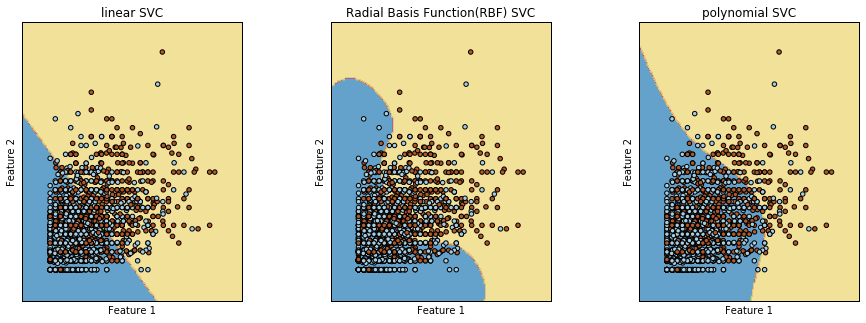

In [27]:
# Your code goes here
titlelist = ['linear SVC', 'Radial Basis Function(RBF) SVC', 'polynomial SVC']
#print(np.array((X_tr_std[20:21],X_tr_std[74:75])))
X_feature = np.column_stack((X_tr_std[:,20],X_tr_std[:,75]))
svc_linear_f = SVC(kernel='linear').fit(X_feature, y_tr)
svc_rbf_f = SVC(kernel='rbf').fit(X_feature, y_tr)
svc_poly_f = SVC(kernel='poly').fit(X_feature, y_tr)
clf_bon = (svc_linear_f, svc_rbf_f, svc_poly_f)
show_svc_decision_boundaries(clf_bon, X_feature, titlelist)
print(X_feature)

*Your answer goes here*

It is clear that the boundary of Linear SVC is a straight line, and both RBF and polynominal have a non-linear boundary. Different dot represent different features, however these two feature are mix together, that is why their accuracy of the validation sets are low. 

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

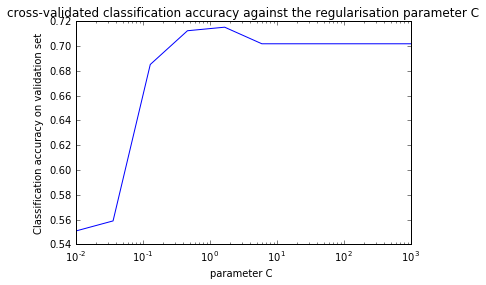

the optimal of the regularisation parameter C:  1.6681005372
the highest obtained mean accuracy score: 0.715230644637
accuracy on training set: 0.974677496417
accuracy on validation set: 0.727762803235


In [36]:
# Your code goes here
c_list=np.logspace(-2, 3, 10)
score = np.empty(shape = [0,2])
each_score=[]
i=0
for i in range(10):
    SVC_rbf_n = SVC(C=c_list[i], kernel='rbf', gamma='auto')
    for train_index, test_index in kf:
        X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
        y_train, y_test = y_tr[train_index], y_tr[test_index]
        SVC_rbf_n.fit(X_train, y_train)
        each_score = np.append(each_score, SVC_rbf_n.score(X_test,y_test)) 
    avg_score = np.average(each_score)
    score = np.append(score, [[c_list[i], avg_score]],axis=0)
    each_score=[]
    

plt.plot(c_list, score[:,1])
plt.xlabel('parameter C ')
plt.ylabel('Classification accuracy on validation set')
plt.title('cross-validated classification accuracy against the regularisation parameter C')
plt.xscale('log')
plt.show()

maxindex = np.where(score[:,1] == np.max(score[:,1]))
opt_c = score[maxindex][0][0]
SVC_rbf_opt = SVC(C=opt_c, kernel='rbf', gamma='auto').fit(X_tr_std, y_tr)
print("the optimal of the regularisation parameter C: ", opt_c)
print("the highest obtained mean accuracy score:", np.max(score[:,1]))
print("accuracy on training set: {}".format(SVC_rbf_opt.score(X_tr_std, y_tr)))
print("accuracy on validation set: {}".format(SVC_rbf_opt.score(X_val_std, y_val)))

### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

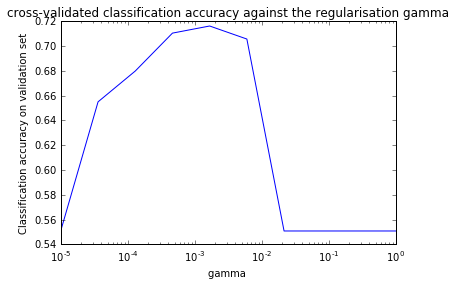

the optimal of the regularisation parameter C:  0.0016681005372
the highest obtained mean accuracy score: 0.716185754475
accuracy on training set: 0.891065456283
accuracy on validation set: 0.726864330638


In [37]:
# Your code goes here
g_list=np.logspace(-5, 0, 10)
score = np.empty(shape = [0,2])
each_score=[]
i=0
for i in range(10):
    SVC_rbf_g = SVC(C = 1.0, kernel = 'rbf', gamma = g_list[i])
    for train_index, test_index in kf:
        X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
        y_train, y_test = y_tr[train_index], y_tr[test_index]
        SVC_rbf_g.fit(X_train, y_train)
        each_score = np.append(each_score, SVC_rbf_g.score(X_test,y_test)) 
    avg_score = np.average(each_score)
    score = np.append(score, [[g_list[i], avg_score]],axis=0)
    each_score=[]
    

plt.plot(g_list, score[:,1])
plt.xlabel('gamma ')
plt.ylabel('Classification accuracy on validation set')
plt.title('cross-validated classification accuracy against the regularisation gamma')
plt.xscale('log')
plt.show()

maxindex = np.where(score[:,1] == np.max(score[:,1]))
opt_g = score[maxindex][0][0]
SVC_rbf_opt_g = SVC(C=1.0, kernel='rbf', gamma=opt_g).fit(X_tr_std, y_tr)
print("the optimal of the regularisation parameter C: ", opt_g)
print("the highest obtained mean accuracy score:", np.max(score[:,1]))
print("accuracy on training set: {}".format(SVC_rbf_opt_g.score(X_tr_std, y_tr)))
print("accuracy on validation set: {}".format(SVC_rbf_opt_g.score(X_val_std, y_val)))


### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

the optimal value for the regularisation parameter g:  0.001
the optimal value for the regularisation parameter c:  1.0
accuracy on the training set:  0.834687052078
accuracy on the valdation set:  0.721473495058


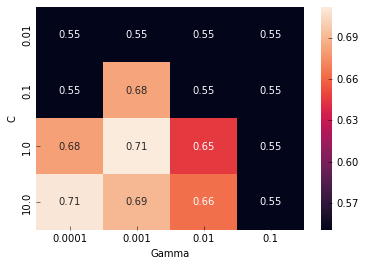

In [103]:
# Your code goes here
C = np.logspace(-2, 1, 4)
G= np.logspace(-4, -1, 4)
SVC_rbf_new = SVC(kernel = 'rbf')
score = np.empty(shape = [0,3])
each_score=[]
i=0
for c in C:
    SVC_rbf_new.C = c
    for g in G:
        SVC_rbf_new.gamma = g
        for train_index, test_index in kf:
            X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
            y_train, y_test = y_tr[train_index], y_tr[test_index]
            SVC_rbf_new.fit(X_train, y_train)
            each_score = np.append(each_score, SVC_rbf_new.score(X_test,y_test)) 
        avg_score = np.average(each_score)
        score = np.append(score, [[c, g, avg_score]],axis=0)
        each_score=[]
score_list = score[:,2]
new_list = [score_list[i:i+4] for i in range(0, len(score_list), 4)]
score_df = pd.DataFrame(new_list,index=C, columns=G)
ax = sns.heatmap(score_df, annot=True)
plt.xlabel("Gamma")
plt.ylabel("C")

c_g_opt = score_df.unstack().idxmax()
opt_g = c_g_opt[0]
opt_c = c_g_opt[1]
SVC_rbf_opt = SVC(kernel='rbf', gamma= opt_g, C=opt_c).fit(X_tr_std, y_tr)
print('the optimal value for the regularisation parameter g: ',opt_g)
print('the optimal value for the regularisation parameter c: ',opt_c)
print('accuracy on the training set: ',SVC_rbf_opt.score(X_tr_std, y_tr))
print('accuracy on the valdation set: ',SVC_rbf_opt.score(X_val_std, y_val))

### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

*Your answer goes here*

No, one possible reason is that the step length for the trial values of C and gamma is too big. We should decrease the step length for the trial values of C and gamma, but this method could increase the computation and computing time.

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

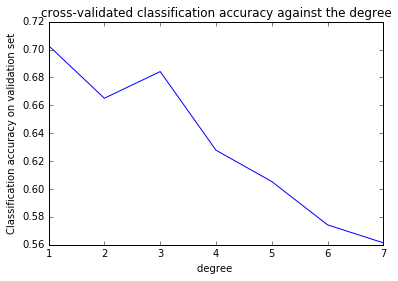

In [59]:
# Your code goes 
p = np.arange(1,8)
score = [[] for j in range(3)]
k=0
for train_index, test_index in kf:
    X_train, X_test = X_tr_std[train_index], X_tr_std[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
    for i in p:
        SVC_poly = SVC(kernel='poly', degree=i).fit(X_train,y_train)
        score[k].append(SVC_poly.score(X_test, y_test))
    #score_mean.append(np.average(score))
    #score = []
    k+=1
score_arr = np.array(score)
score_mean = score_arr.mean(axis=0)

plt.plot(p,score_mean)
plt.xlabel('degree ')
plt.ylabel('Classification accuracy on validation set')
plt.title('cross-validated classification accuracy against the degree')
plt.show()

In [72]:
maxindex = np.where(score_mean == score_mean.max())
SVC_poly_opt = SVC(kernel='poly', degree=maxindex[0][0]+1).fit(X_tr_std, y_tr)
print("the optimal of the value of the degree parameter: degree ", maxindex[0][0]+1)
print("the highest obtained mean accuracy score:", score_mean[maxindex[0][0]])
print("accuracy on training set: {}".format(SVC_poly_opt.score(X_tr_std, y_tr)))
print("accuracy on validation set: {}".format(SVC_poly_opt.score(X_val_std, y_val)))

the optimal of the value of the degree parameter: degree  1
the highest obtained mean accuracy score: 0.702810105802
accuracy on training set: 0.783564261825
accuracy on validation set: 0.689128481581


### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

Hold out 

Advantage: It is fast and lesser cost, because the dataset is only divided into two dataset.
Disadvantage: lower efficiency and the model can only be trained by the training set, which makes the result less reliable.

CV

Advantage : Cross validation picks out different sets of training and testing data samples, which make the optimisation of parameters are more accurate. And this can be good as we get a range of samples.
Disadvantage: Expensive for large sample.

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [35]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path, delimiter = ',')
X_train = train_A.drop(["imgId","is_person"], axis=1)
X_test = valid_A.drop(["imgId","is_person"], axis=1)
y_train = train_A["is_person"]
y_test = valid_A["is_person"]

scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

rfl = RandomForestClassifier(criterion="entropy", n_estimators=500, random_state=31)
rfl.fit(X_train_std, y_train)
print("Accuracy on the Training set: {}".format(rfl.score(X_train_std, y_train)))
print("Accuracy on the validation set: {}".format(rfl.score(X_test_std, y_test)))

importance = rfl.feature_importances_
importance = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
des_importance = importance.sort_index(by='Importance', ascending=False)
print(des_importance.head(50))

Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.711590296496
              Importance
is_cat          0.009379
is_bird         0.008731
dim21           0.008030
dim51           0.005925
dim360          0.005463
dim4            0.005325
dim76           0.005271
dim398          0.005254
dim283          0.004983
dim479          0.004942
dim263          0.004734
dim343          0.004609
dim423          0.004433
dim485          0.004245
dim254          0.004189
dim461          0.004158
dim222          0.004134
dim356          0.003914
dim74           0.003860
dim288          0.003850
dim214          0.003792
dim348          0.003781
dim330          0.003713
dim217          0.003683
dim483          0.003633
dim90           0.003626
dim274          0.003597
dim347          0.003533
dim17           0.003448
dim427          0.003377
dim35           0.003306
dim326          0.003298
dim73           0.003267
dim312          0.003193
dim48           0.003160
dim25           0.0

/home/chienyu/anaconda2/envs/iaml/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


*Your answer goes here*

The top 50 feartures changed, the first and second is is_cat and is_bird, repectively.
The accuracy of validation become higher, which means the classifier has improved. The reason why the classifier improved is that there are two really important class indicator variable add in.
Yes, becasue is_cat and is_bird may have some correlation with is_person.

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see Lab 4). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/0.17/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/0.17/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

*Your answer goes here (max. 600 words)*

    In the mini challenge is to find the best classifier for recognize the object is person or not person. The full dataset has 539 attributes, including 500 dimensions and 19 different classes. Since the feature space in high dimension, I choose several non-linear classifications to look for their performance.
    The classifiers I choose are Logistic Regression, Random Forest and Support Vector, and there are several reasons why I choose these classifiers. The logistic function is to transform a linear combination of the input into a non-linear output and It can be applied on distributed data. Moreover, it is efficient in terms of time and memory requirement. Random Forest is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier and runs efficiently on large databases. Support Vector works on the principle of fitting a boundary to a region of points which are alike. Reliance on boundary cases also enables them to handle missing data for “obvious” cases. It can handle large feature space and non-linear feature interactions.
    After training and evaluating these models, I found Random forest classifier perform the best. I got 62% and 60% for accuracy of training and validation set in Logistic regression. One reason for the bad performance is the large feature space. In Random forest I got 100% in training set and 70% in validation set. The last one, Support Vector, I got 67% and 64% accurate on training and validation set, respectively. Since the Random forest classifier has the highest accuracy rate, I chose it as my classifier model. Before applying it to the test set, I tested the accuracy rate for different estimators. I tried 300, 400, 500, 600 and 700 estimators, and found that 500 estimators have the best performance.
    Applied the test set in the model, I estimate the posterior probabilities for the data points and evaluated the logarithmic loss. The final result I got 0.468 of log loss. Logarithmic loss measures the performance of a classification model, and the goal is to minimize this value. Log Loss considers the uncertainty of your prediction based on how much it varies from the actual label. However, I only got 0.468 of log loss, if the model needs to enhance the accuracy of recognizing the object, it will need to make some improvements.

In [10]:
# Your code goes here
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path, delimiter = ',')
data_path = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path, delimiter = ',')

X_tr_B = train_B.iloc[:,1:501] 
X_val_B = valid_B.iloc[:,1:501]   
X_test_B = test_B.iloc[:,0:500]
y_tr_B = train_B["is_person"]   
y_val_B = valid_B["is_person"] 
y_test_B = test_B["is_person"] 

scale = StandardScaler().fit(X_tr_B)
X_trB_std = scale.transform(X_tr_B)
X_valB_std = scale.transform(X_val_B)
X_testB_std = scale.transform(X_test_B)

kf = KFold(2093, n_folds=3, shuffle = True, random_state=0)

print(y_tr_B.shape)

(2113,)


TThe baseline classifier accuracy score: 0.551822053952


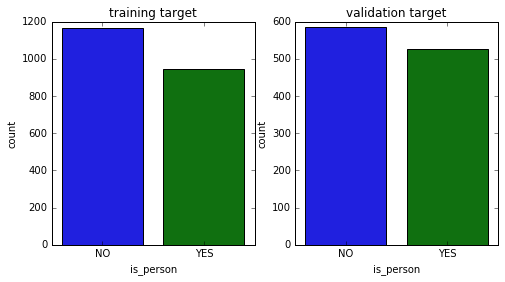

In [4]:
#baseline classification
fig = plt.figure(figsize=(8,4))
labels=["NO","YES"]
ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(x=y_tr_B, data = train_B)
ax1.set_xticklabels(labels)
ax1.set_title("training target")
                    
ax2 = plt.subplot(1,2,2)
ax2 = sns.countplot(x=y_val_B, data = valid_B)
ax2.set_xticklabels(labels)
ax2.set_title("validation target")

class_counts = train_B["is_person"].value_counts()
print("TThe baseline classifier accuracy score: {}".format(class_counts[0]/class_counts.values.sum()))

In [5]:
#LogisticRegression classifier
scale = StandardScaler().fit(X_tr_B)
X_trB_std = scale.transform(X_tr_B)
X_valB_std = scale.transform(X_val_B)

LR = LogisticRegression(solver='lbfgs')
LR.fit(X_trB_std, y_tr_B)
print('Classification accuracy on training set: {}'.format(LR.score(X_trB_std, y_tr_B)))
print('Classification accuracy on test set: {}'.format(LR.score(X_valB_std, y_val_B)))

Classification accuracy on training set: 0.621864647421
Classification accuracy on test set: 0.607367475292


In [6]:
#Random Forest Classifier - the accuracy of different estimators 
estimators=[300, 400, 500, 600, 700]
for i in estimators:
    RFL = RandomForestClassifier(n_estimators=i, random_state=42)
    RFL.fit(X_trB_std, y_tr_B)
    print("estimators {}:".format(i))
    print("Accuracy on the Training set: {}".format(RFL.score(X_trB_std, y_tr_B)))
    print("Accuracy on the validation set: {}".format(RFL.score(X_valB_std, y_val_B)))


estimators 300:
Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.693620844564
estimators 400:
Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.696316262354
estimators 500:
Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.700808625337
estimators 600:
Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.69991015274
estimators 700:
Accuracy on the Training set: 1.0
Accuracy on the validation set: 0.69991015274


In [7]:
#random forest classifier
RFL_new = RandomForestClassifier(n_estimators=500, random_state=42)
RFL_new.fit(X_trB_std, y_tr_B)
y_test_B = RFL_new.predict(X_testB_std)
y_pred_prob_rfl = RFL_new.predict_proba(X_testB_std)
print(y_pred_prob_rfl.shape)
print('log loss:', log_loss(y_test_B, y_pred_prob_rfl))


(1114, 2)
log loss: 0.467869419192


In [9]:
#different kernel of SVC accuracy
svc_linear = SVC(kernel='linear').fit(X_trB_std, y_tr_B)
svc_rbf = SVC(kernel='rbf').fit(X_trB_std, y_tr_B)
svc_poly = SVC(kernel='poly').fit(X_trB_std, y_tr_B)
svc_sigmoid = SVC(kernel='sigmoid').fit(X_trB_std, y_tr_B)
print("Linear Accuracy on the Training set: {}".format(svc_linear.score(X_trB_std, y_tr_B)))
print("Linear Accuracy on the validation set: {}".format(svc_linear.score(X_valB_std, y_val_B)))
print("Radial Basis Function Accuracy on the Training set: {}".format(svc_rbf.score(X_trB_std, y_tr_B)))
print("Radial Basis Function Accuracy on the validation set: {}".format(svc_rbf.score(X_valB_std, y_val_B)))
print("Polynomial Accuracy on the Training set: {}".format(svc_poly.score(X_trB_std, y_tr_B)))
print("Polynomial Accuracy on the validation set: {}".format(svc_poly.score(X_valB_std, y_val_B)))
print("Sigmoid Accuracy on the Training set: {}".format(svc_sigmoid.score(X_trB_std, y_tr_B)))
print("Sigmoid Accuracy on the validation set: {}".format(svc_sigmoid.score(X_valB_std, y_val_B)))


Linear Accuracy on the Training set: 0.555134879319
Linear Accuracy on the validation set: 0.526504941599
Radial Basis Function Accuracy on the Training set: 0.555134879319
Radial Basis Function Accuracy on the validation set: 0.526504941599
Polynomial Accuracy on the Training set: 0.555134879319
Polynomial Accuracy on the validation set: 0.526504941599
Sigmoid Accuracy on the Training set: 0.551822053952
Sigmoid Accuracy on the validation set: 0.526504941599


In [11]:
# support vector classifiers
c_list=np.logspace(-2, 3, 10)
score = np.empty(shape = [0,2])
each_score=[]
i=0
for i in range(10):
    SVC_rbf_n = SVC(C=c_list[i], kernel='rbf', gamma='auto')
    for train_index, test_index in kf:
        X_train, X_test = X_trB_std[train_index], X_trB_std[test_index]
        y_train, y_test = y_tr_B[train_index], y_tr_B[test_index]
        SVC_rbf_n.fit(X_train, y_train)
        each_score = np.append(each_score, SVC_rbf_n.score(X_test,y_test)) 
    avg_score = np.average(each_score)
    score = np.append(score, [[c_list[i], avg_score]],axis=0)
    each_score=[]

maxindex = np.where(score[:,1] == np.max(score[:,1]))
opt_c = score[maxindex][0][0]
SVC_rbf_opt_B = SVC(C=opt_c, kernel='rbf', gamma='auto').fit(X_trB_std, y_tr_B)
print("the optimal of the regularisation parameter C: ", opt_c)
print("the highest obtained mean accuracy score:", np.max(score[:,1]))
print("accuracy on training set: {}".format(SVC_rbf_opt_B.score(X_trB_std, y_tr_B)))
print("accuracy on validation set: {}".format(SVC_rbf_opt_B.score(X_valB_std, y_val_B)))

the optimal of the regularisation parameter C:  1000.0
the highest obtained mean accuracy score: 0.647399346908
accuracy on training set: 0.677236157123
accuracy on validation set: 0.649595687332


In [18]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(y_pred_prob_rfl) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)